<a href="https://colab.research.google.com/github/Miqquelangel/Proyecto-1-Regression/blob/main/Predicci%C3%B3n_de_gastos_m%C3%A9dicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OVERVIEW
Este proyecto es una adaptación de otro realizado en el curso **TensorFlow Developer Certificate in 2021: Zero to Mastery.**

Vamos a proceder a estimar los gastos médicos de una aseguradora según diferentes variables de sus clientes como la edad, cantidad de hijos, etc. Las variables los veremos más adelante cuando visualicemos los datos con los cuales vamos a trabajar.

**-Funciones a realizar:**

* Visualizar los datos con los cuales vamos a trabajar y prepararlos para ser introducidos en nuestro modelo (normalización).
* Creación de un modelo de regresión lineal con los algoritmos más adaptados a nuestras necesidades. En este modelo concreto, trabajaremos con el algoritmo "MAE" (Mean Absolute Error), y el optimizador ADAM.
* Visualizacion de la arquitectura de nuestro modelo y representación de forma gráfica de los parámetros obtenidos del mismo.
* Representación gráfica de las predicciones de nuestro modelo y análisis.


#PREPARACIÓN DEL ENTORNO DE TRABAJO


In [ ]:
#Vamos a empezar importando las librerias que vayamos a necesitar. A medida que vayamos necesitando más importaremos las correspondientes.
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#RECOLECCIÓN DE DATOS Y PREPROCESAMIENTO

**Visualización de nuestros datos**

In [ ]:
# La plantilla de datos que vamos a utilizar nos la proporciona la empresa en formato CSV, asi que vamos a proceder a descargarla:
aseguradora = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
aseguradora # Como podemos observar necesitamos procesar estos datos ya que las columnas con texto tendran que ser convertidas a formato numérico.
           # Los datos numéricos, serán convertidos mediante normalización, para que nuestro modelo sea más eficiente a la hora de trabajar.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Preprocesamiento**

In [ ]:
# Vamos a convertir las distintas columnas de nuestra plantillas para que nuestro modelo entrene de manera óptima:
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)


# Vamos a crear X e Y:
x = aseguradora.drop("charges",axis=1)
y = aseguradora["charges"] 


# Vamos a crear nuestros sets de entrenamiento al 80% de nuestros datos totales(se utilizarán en el modelo) y de testeo al 20% (se utilizarán en las predicciones)
xt, xtest, yt, ytest = train_test_split(x, y, test_size=0.2,random_state=42)

# Procedemos a normalizar los datos que se utilizarán en el modelo de entrenamiento y en las predicciones:
ct.fit(xt)
xt_normalizado=ct.transform(xt)
xtest_normalizado=ct.transform(xtest)

**Visualizar nuestros datos**

In [ ]:
x

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
xt_normalizado

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

##CREACIÓN DEL MODELO PRIMIGENIO

**Modelo con 'Callbacks' para poder realizar los siguientes modelos.**

In [ ]:
# Vamos a empezar a crear nuestro modelo con callbacks.
# De esta manera podremos representar gráficos del 'MAE' respecto al 'lr'(Learning rate) para que en los proximos modelos los resultados sean más precisos.

tf.keras.set_seed = 42 # Set_seed es importante ya que necesitamos la máxima reproducibilidad.

# Creación del modelo utilizando API secuencial.
Modelo_callback = tf.keras.Sequential([
   tf.keras.layers.Dense(10, activation = "relu"), # Utilizamos la funcion 'ReLu' ya que los valores que queremos predecir, son mayores que 0.
   tf.keras.layers.Dense(10, activation = "relu"),
   tf.keras.layers.Dense(1, activation="relu") # Nuestro output layer será de valor '1' ya que solo pretendemos predecir un único valor.
])

# Compilamos el modelo.
Modelo_callback.compile(loss = "mae",
           optimizer = "Adam",
           metrics = ["mae"])

# Establecemos un set de valores del learning rate empezando desde 1e-4, incrementando 10**(epoch/20) cada epoch.
lr_ratio = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

# Encajamos el modelo.
history_callback = Modelo_callback.fit(xt_normalizado, yt, epochs=170, verbose=0, callbacks = [lr_ratio])

# Evaluamos el modelo
Modelo_callback.evaluate(xt_normalizado, yt)

34/34 [==============================] - 0s 1ms/step - loss: 8355.3320 - mae: 8355.3320


[8355.33203125, 8355.33203125]

**Arquitectura de nuestro modelo Callback.**

In [ ]:
Modelo_callback.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 10)                120       
_________________________________________________________________
dense_60 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


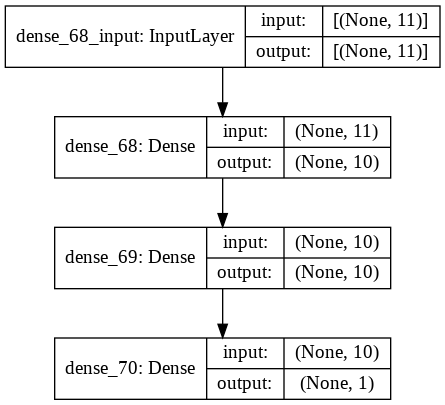

In [ ]:
plot_model(Modelo_callback,show_shapes=True)



**Representación gráfica de nuestro modelo callback para optimizar los siguientes modelos.**

In [ ]:
# Vamos a definir 2 funciones para poder visualizar el 'MAE' respecto el learning rate.
def grafico_mae_lr(history):
  pd.DataFrame(history.history).plot(figsize=(10,8),xlabel="epochs") 

def lr_loss(history):
  plt.figure(figsize=(20,7))
  plt.semilogx(lrs,history.history["loss"])
  plt.xlabel("learning rate")
  plt.ylabel("loss")

(None, None)

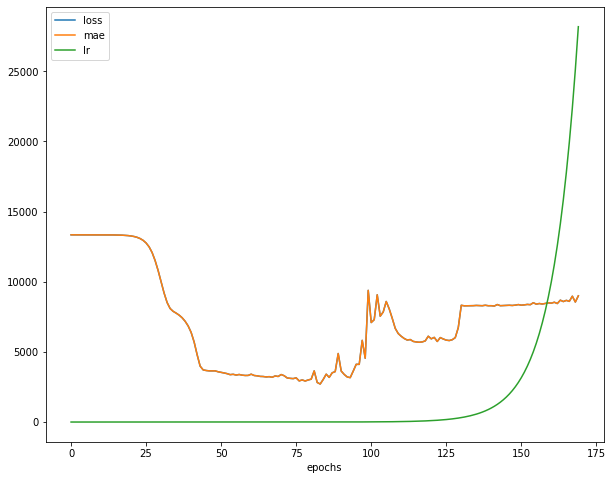

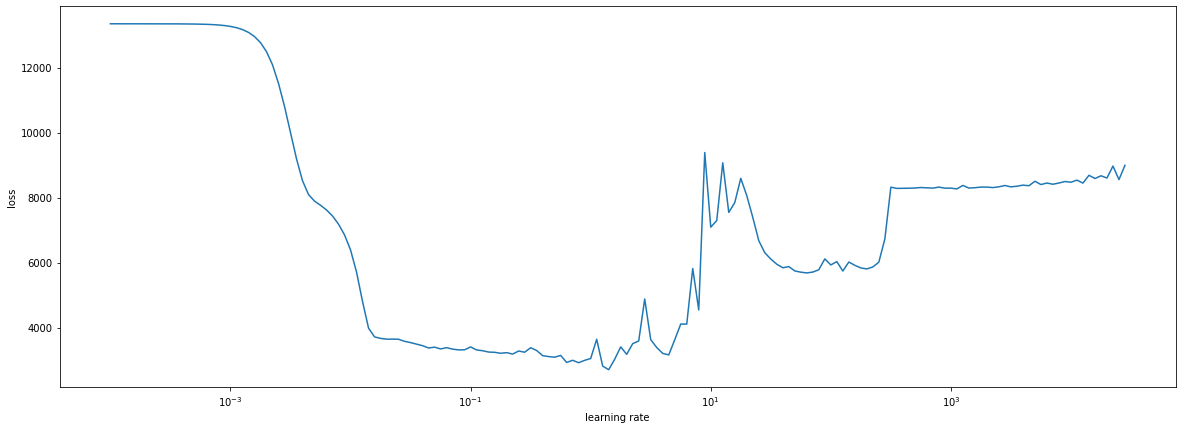

In [ ]:
grafico_mae_lr(history_callback), lr_loss(history_callback)

#MODELOS DE ENTRENAMIENTO

**Vamos a comenzar con nuestro primer modelo de entrenamiento utilizando la misma arquitectura 
pero probando distintos valores de Learning rate y epochs.**

In [ ]:
# Vamos a realizar el primer modelo de entrenamiento con un valor aproximado.

# Teniendo en cuenta que:
# lr_ratio = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

# Deducimos:
lr_valor = 1e-4 *10**(tf.range(170)/20) # 170 epochs porque son los epochs del modelo callback.



#***Modelo_1***

**Learning rate de 60 epochs.**

In [ ]:
lr_valor[60]

<tf.Tensor: shape=(), dtype=float64, numpy=0.10000000000000002>

In [ ]:
tf.keras.set_seed = 42 

# Creación del modelo utilizando API secuencial.
Modelo_1 = tf.keras.Sequential([
   tf.keras.layers.Dense(10, activation = "relu"),
   tf.keras.layers.Dense(10, activation = "relu"),
   tf.keras.layers.Dense(1) 
])

# Compilamos el modelo.
Modelo_1.compile(loss = "mae",
           optimizer = tf.keras.optimizers.Adam(0.10000000000000002),
           metrics = ["mae"])

# Encajamos el modelo.
history_1 = Modelo_1.fit(xt_normalizado, yt, epochs=60, verbose=0)

# Evaluamos el modelo.
Modelo_1.evaluate(xt_normalizado, yt)

34/34 [==============================] - 0s 1ms/step - loss: 2107.5359 - mae: 2107.5359


[2107.535888671875, 2107.535888671875]

**Funciones 'MAE' y 'MSE' para visualizar este modelo y comparar los siguientes:**




In [ ]:
# Definimos las funciones:
def mae(modelo):
  y_pred = modelo.predict(xtest_normalizado)
  return tf.metrics.mean_absolute_error(ytest, tf.squeeze(y_pred)).numpy()

def mse(modelo):
  y_pred = modelo.predict(xtest_normalizado)
  return tf.metrics.mean_squared_error(ytest, tf.squeeze(y_pred)).numpy()

def mae_mse(modelo):
  resultado_modelo = [["Modelo", mae(modelo), mse(modelo)]]
  return pd.DataFrame(resultado_modelo, columns=["Modelo", "MAE", "MSE"])

def mae_grafico(history):
  pd.DataFrame(history.history).plot()
  plt.ylabel("loss")
  plt.xlabel("epochs")

In [ ]:
# Visualizamos el 'MAE y el 'MSE' de nuestro Modelo_1 respectivamente:
mae_mse(Modelo_1)

,Modelo,MAE,MSE
0,Modelo,1788.066406,21212808.0


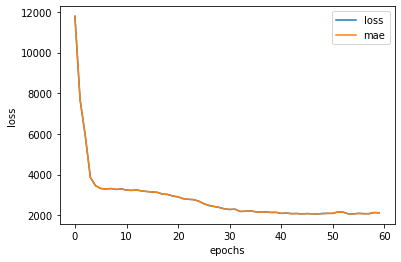

In [ ]:
# Visualizamos el 'MAE' gráficamente.
mae_grafico(history_1)


#***Modelo_2 (misma arquitectura que el Modelo_1, distinto Learning rate, diferente epochs)***



In [ ]:
lr_valor[75]

<tf.Tensor: shape=(), dtype=float64, numpy=0.5623413251903492>

In [ ]:
tf.keras.set_seed = 42 

# Creación del modelo utilizando API secuencial.
Modelo_2 = tf.keras.Sequential([
   tf.keras.layers.Dense(10, activation = "relu"),
   tf.keras.layers.Dense(10, activation = "relu"),
   tf.keras.layers.Dense(1)
])

# Compilamos el modelo.
Modelo_2.compile(loss = "mae",
           optimizer = tf.keras.optimizers.Adam(0.5623413251903492),
           metrics = ["mae"])

# Encajamos el modelo.
history_2 = Modelo_2.fit(xt_normalizado, yt, epochs=75, verbose=0)

# Evaluamos el modelo
Modelo_2.evaluate(xt_normalizado, yt)

34/34 [==============================] - 0s 1ms/step - loss: 2214.5405 - mae: 2214.5405


[2214.54052734375, 2214.54052734375]

**Visualizamos el 'MAE' y el 'MSE':**

In [ ]:
mae_mse(Modelo_2)

,Modelo,MAE,MSE
0,Modelo,2029.165527,22135990.0


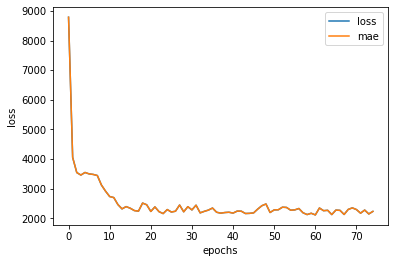

In [ ]:
mae_grafico(history_2)

#***Modelo_3 (diferente arquitectura, mismo learning rate, diferente epochs)***



In [ ]:
tf.keras.set_seed = 42 

# Creación del modelo utilizando API secuencial.
Modelo_3 = tf.keras.Sequential([
   tf.keras.layers.Dense(100, activation = "relu"),
   tf.keras.layers.Dense(100, activation = "relu"),
   tf.keras.layers.Dense(1)
])

# Compilamos el modelo.
Modelo_3.compile(loss = "mae",
           optimizer = tf.keras.optimizers.Adam(0.5623413251903492),
           metrics = ["mae"])

# Encajamos el modelo.
history_3 = Modelo_3.fit(xt_normalizado, yt, epochs=105, verbose=0)

# Evaluamos el modelo
Modelo_3.evaluate(xt_normalizado, yt)

34/34 [==============================] - 0s 1ms/step - loss: 1707.5151 - mae: 1707.5151


[1707.51513671875, 1707.51513671875]

**Visualización de la arquitectura:**

In [ ]:
Modelo_3.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_107 (Dense)            (None, 100)               1200      
_________________________________________________________________
dense_108 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_109 (Dense)            (None, 1)                 101       
Total params: 11,401
Trainable params: 11,401
Non-trainable params: 0
_________________________________________________________________


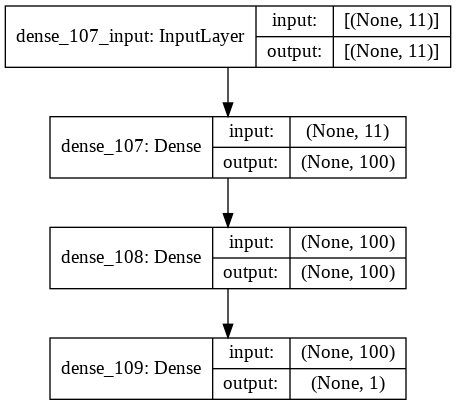

In [ ]:
plot_model(Modelo_3,show_shapes=True)

**Visualizamos el 'MAE' y el 'MSE':**

In [ ]:
mae_mse(Modelo_3)

,Modelo,MAE,MSE
0,Modelo,1462.739868,18999580.0


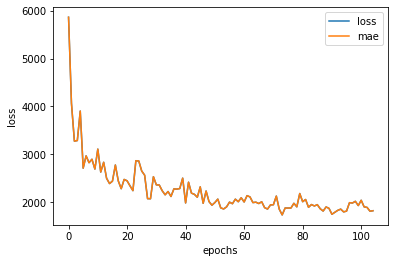

In [ ]:
mae_grafico(history_3)

#***Modelo_4 (experimentación aleatoria para obtener el valor de 'MAE' más bajo)***

In [ ]:
tf.keras.set_seed = 42 

# Creación del modelo utilizando API secuencial.
Modelo_4 = tf.keras.Sequential([
   tf.keras.layers.Dense(100, activation = "relu"),
   tf.keras.layers.Dense(100, activation = "relu"),
   tf.keras.layers.Dense(1)
])

# Compilamos el modelo.
Modelo_4.compile(loss = "mae",
           optimizer = tf.keras.optimizers.Adam(0.5623411903492),
           metrics = ["mae"])

# Encajamos el modelo.
history_4 = Modelo_4.fit(xt_normalizado, yt, epochs=125, verbose=0)

# Evaluamos el modelo
Modelo_4.evaluate(xt_normalizado, yt)

34/34 [==============================] - 0s 1ms/step - loss: 1808.2025 - mae: 1808.2025


[1808.2025146484375, 1808.2025146484375]

In [ ]:
mae_mse(Modelo_4)

,Modelo,MAE,MSE
0,Modelo,1582.044678,19792340.0


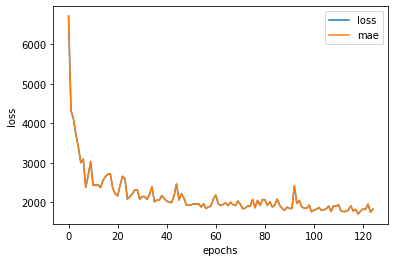

In [ ]:
mae_grafico(history_4)

#***Modelo_5 (segunda experimentación aleatoria para obtener el valor de 'MAE' más bajo)***

In [ ]:
tf.keras.set_seed = 42 

# Creación del modelo utilizando API secuencial.
Modelo_5 = tf.keras.Sequential([
   tf.keras.layers.Dense(100, activation = "relu"),
   tf.keras.layers.Dense(100, activation = "relu"),
   tf.keras.layers.Dense(1)
])

# Compilamos el modelo.
Modelo_5.compile(loss = "mae",
           optimizer = tf.keras.optimizers.Adam(0.50499999999999996),
           metrics = ["mae"])

# Encajamos el modelo.
history_5 = Modelo_5.fit(xt_normalizado, yt, epochs=80, verbose=0)

# Evaluamos el modelo
Modelo_5.evaluate(xt_normalizado, yt)

34/34 [==============================] - 0s 1ms/step - loss: 1720.4823 - mae: 1720.4823


[1720.4822998046875, 1720.4822998046875]

In [ ]:
mae_mse(Modelo_5)

,Modelo,MAE,MSE
0,Modelo,1518.762451,19148414.0


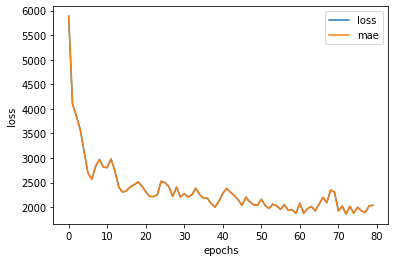

In [ ]:
mae_grafico(history_5)

#COMPARACIÓN DE MODELOS

**Vamos a comparar los resultados obtenidos entre los distintos modelos para escoger el definitivo.**

In [ ]:
resultados = [["Modelo_1", mae(Modelo_1), mse(Modelo_1)],
                 ["Modelo_2", mae(Modelo_2), mse(Modelo_2)],
                 ["Modelo_3", mae(Modelo_3), mae(Modelo_3)],
                 ["Modelo_4", mae(Modelo_4), mse(Modelo_4)],
                 ["Modelo_5", mae(Modelo_5), mae(Modelo_5)]]

comparativa=pd.DataFrame(resultados, columns=["Modelos", "MAE", "MSE"])
comparativa

,Modelos,MAE,MSE
0,Modelo_1,1788.066406,2.121281e+07
1,Modelo_2,2029.165527,2.213599e+07
2,Modelo_3,1462.739868,1.462740e+03
3,Modelo_4,1582.044678,1.979234e+07
4,Modelo_5,1518.762451,1.518762e+03


**Como podemos observar el Modelo_3 tiene el 'MAE' más bajo, por tanto, será nuestro modelo óptimo.**

#ARQUITECTURA E INFORMACIÓN SOBRE EL MODELO FINAL ESCOGIDO (MODELO_3)

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_107 (Dense)            (None, 100)               1200      
_________________________________________________________________
dense_108 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_109 (Dense)            (None, 1)                 101       
Total params: 11,401
Trainable params: 11,401
Non-trainable params: 0
_________________________________________________________________


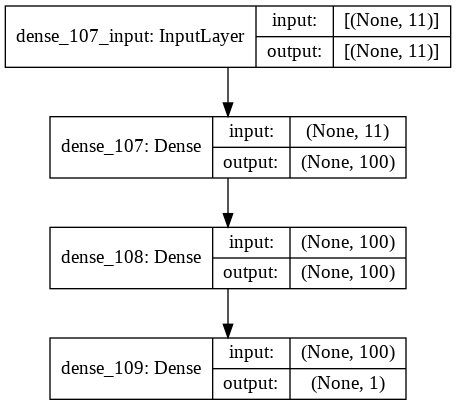

In [ ]:
Modelo_3.summary(),
plot_model(Modelo_3, show_shapes=True)

In [ ]:
mae_mse(Modelo_3)

,Modelo,MAE,MSE
0,Modelo,1462.739868,18999580.0


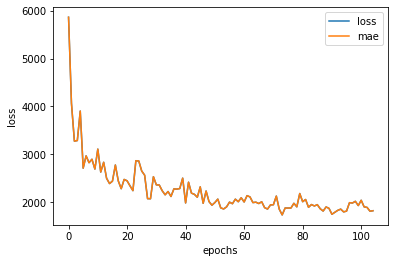

In [ ]:
mae_grafico(history_3)

In [ ]:
tf.keras.set_seed = 42 

# Creación del modelo utilizando API secuencial.
Modelo_3 = tf.keras.Sequential([
   tf.keras.layers.Dense(100, activation = "relu"),
   tf.keras.layers.Dense(100, activation = "relu"),
   tf.keras.layers.Dense(1)
])

# Compilamos el modelo.
Modelo_3.compile(loss = "mae",
           optimizer = tf.keras.optimizers.Adam(0.5623413251903492),
           metrics = ["mae"])

# Encajamos el modelo.
history_3 = Modelo_3.fit(xt_normalizado, yt, epochs=105, verbose=0)

# Evaluamos el modelo
Modelo_3.evaluate(xt_normalizado, yt)

#PREDICCIONES

**Vamos a ver la representación de las predicciones del Modelo_3 y compararlas con los valores reales.**


In [ ]:
# Visualizamos las predicciones:
y_pred_Modelo3 = Modelo_3.predict(xtest_normalizado)
Predicciones = pd.DataFrame(y_pred_Modelo3, columns=["Predicciones"])
Predicciones

,Predicciones
0,9001.311523
1,5246.179688
2,28862.939453
3,9425.031250
4,30464.597656
...,...
263,45176.152344
264,12261.254883
265,5990.092285
266,52207.960938


In [ ]:
# Visualizamos los valores reales de 'y' (set de test)
Real = pd.DataFrame(ytest)
Real

,charges
764,9095.06825
887,5272.17580
890,29330.98315
1293,9301.89355
259,33750.29180
...,...
109,47055.53210
575,12222.89830
535,6067.12675
543,63770.42801


#CONCLUSIONES

**Todavía se podría llegar a optimizar más el modelo para obtener predicciones más exactas.**

**Este Proyecto es una demostración de como se podrían realizar modelos para poder predecir, en este caso, el precio estimado de un seguro médico (variable 'y'), en función de la edad, el sexo, bmi, hijos, si es fumador y la región donde vive (variables 'x').**